# Sales Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# # Read in the csv file and display some of the basic info

In [3]:
#sales=pd.read_csv(os.path.dirname(os.path.abspath(__file__))+'/sample-salesv2.csv',parse_dates=['date'])
sales=pd.read_csv('sample-salesv2.csv',parse_dates=['date'])

In [4]:
print("Data types in the file:")
print(sales.dtypes)

Data types in the file:
account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
account number    1000 non-null int64
name              1000 non-null object
sku               1000 non-null object
category          1000 non-null object
quantity          1000 non-null int64
unit price        1000 non-null float64
ext price         1000 non-null float64
date              1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 62.6+ KB


In [5]:
print("Summary of the input file:") 
print(sales.describe())

Summary of the input file:
       account number     quantity   unit price   ext price
count     1000.000000  1000.000000  1000.000000  1000.00000
mean    535208.897000    10.328000    56.179630   579.84390
std     277589.746014     5.687597    25.331939   435.30381
min      93356.000000     1.000000    10.060000    10.38000
25%     299771.000000     5.750000    35.995000   232.60500
50%     563905.000000    10.000000    56.765000   471.72000
75%     750461.000000    15.000000    76.802500   878.13750
max     995267.000000    20.000000    99.970000  1994.80000


In [6]:
print(sales.describe(include='all'))

        account number                           name       sku category  \
count      1000.000000                           1000      1000     1000   
unique             NaN                             20        10        3   
top                NaN  Senger, Upton and Breitenberg  QN-82852    Shirt   
freq               NaN                             59       109      404   
first              NaN                            NaN       NaN      NaN   
last               NaN                            NaN       NaN      NaN   
mean     535208.897000                            NaN       NaN      NaN   
std      277589.746014                            NaN       NaN      NaN   
min       93356.000000                            NaN       NaN      NaN   
25%      299771.000000                            NaN       NaN      NaN   
50%      563905.000000                            NaN       NaN      NaN   
75%      750461.000000                            NaN       NaN      NaN   
max      995

In [6]:
print("Basic unit price stats:")
print(sales['unit price'].describe())

Basic unit price stats:
count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64


In [7]:
# Filter the columns down to the ones we need to look at for customer sales
customers = sales[['name','ext price','date']]
customers[::100]

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:03
100,Gorczany-Hahn,88.20,2014-08-09 18:31:40
200,Kunze Inc,523.77,2014-09-01 23:53:15
300,Gorczany-Hahn,963.00,2013-11-06 05:25:34
400,"Senger, Upton and Breitenberg",134.97,2014-01-15 07:26:27
500,Cole-Eichmann,1413.12,2014-06-17 22:27:38
600,Carroll PLC,226.56,2014-10-01 04:15:37
700,Hegmann and Sons,602.69,2014-05-20 14:10:47
800,Waelchi-Fahey,883.60,2014-08-24 23:09:27
900,Huel-Haag,290.60,2014-08-02 12:08:32


In [8]:
#Group the customers by name and sum their sales
customer_group = customers.groupby('name')
sales_totals = customer_group.sum()

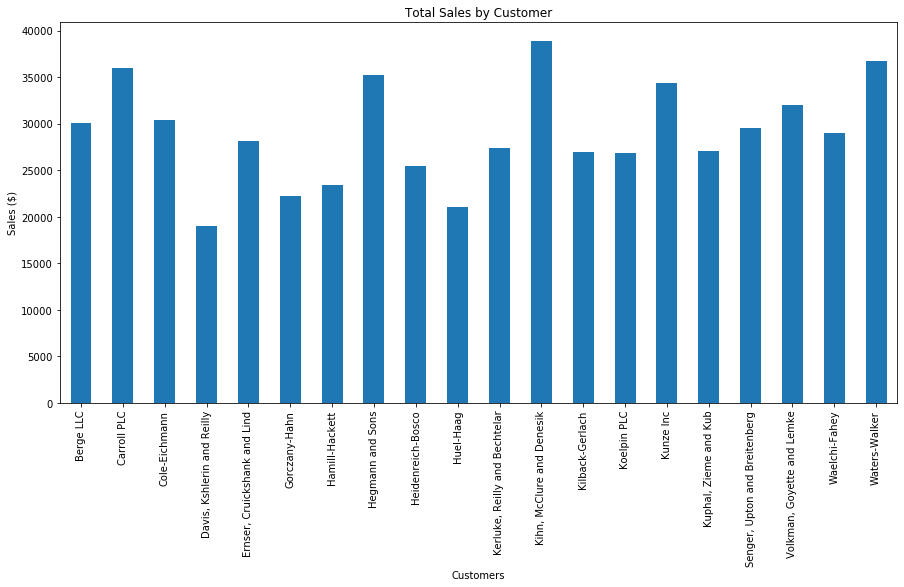

In [17]:
# Create a basic bar chart for the sales data and show it
#bar_plot = sales_totals.sort(columns='ext price',ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
bar_plot = sales_totals.plot(kind='bar',legend=None,title="Total Sales by Customer",figsize=(15,7))
bar_plot.set_xlabel("Customers")
bar_plot.set_ylabel("Sales ($)")
plt.show()

In [10]:
# Do a similar chart but break down by category in stacked bars
# Select the appropriate columns and group by name and category
customers = sales[['name','category','ext price','date']]
category_group = customers.groupby(['name','category']).sum()

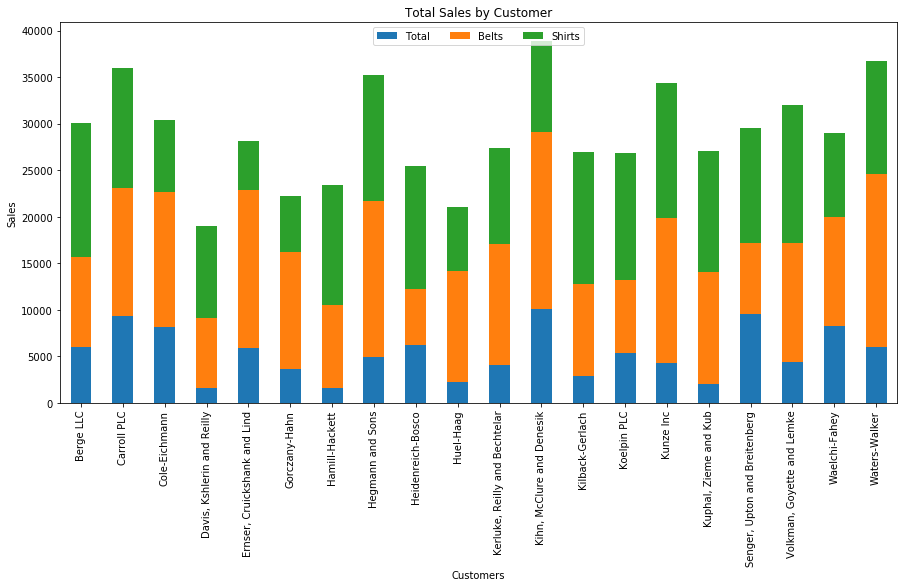

In [16]:
# Plot and show the stacked bar chart
stack_bar_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(15,7))
stack_bar_plot.set_xlabel("Customers")
stack_bar_plot.set_ylabel("Sales")
stack_bar_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)
plt.show()

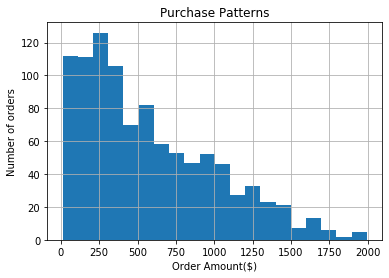

In [18]:
# Create a simple histogram of purchase volumes
purchase_patterns = sales[['ext price','date']]
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")
plt.show()

C:\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


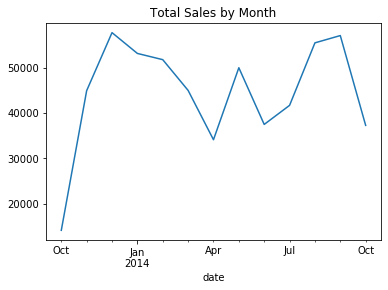

In [19]:
# Create a line chart showing purchases by month
purchase_patterns = purchase_patterns.set_index('date')
month_plot = purchase_patterns.resample('M',how=sum).plot(title="Total Sales by Month",legend=None)
fig = month_plot.get_figure()

In [20]:
#Show the image, then save it
plt.show()
fig.savefig("total-sales.png")